In [3]:
! wget https://raw.githubusercontent.com/DorkEMK/ftyers.github.io/master/2018-komp-ling/practicals/transliteration/freq_sort.txt > freq.txt
  

--2019-04-02 12:57:34--  https://raw.githubusercontent.com/DorkEMK/ftyers.github.io/master/2018-komp-ling/practicals/transliteration/freq_sort.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2095981 (2.0M) [text/plain]
Saving to: ‘freq_sort.txt.1’

freq_sort.txt.1     100%[===================>]   2.00M  --.-KB/s    in 0.06s   

2019-04-02 12:57:34 (32.7 MB/s) - ‘freq_sort.txt.1’ saved [2095981/2095981]



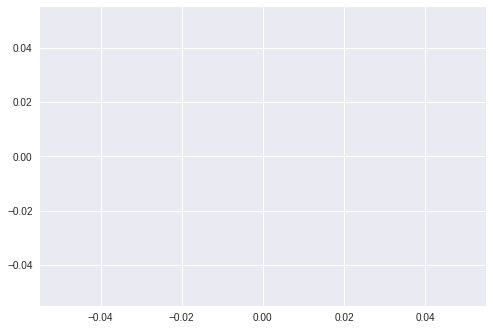

In [5]:
import sys
# import matplotlib
import matplotlib.pyplot as plt

x = []
y = []

fd = open('freq.txt', 'r')
for line in fd.readlines():
    line = line.strip()
    if line == '':
        continue

    row = line.split('\t')
    x.append(int(row[0]))
    y.append(int(row[1]))

plt.plot(x, y, 'ro')
plt.show()

In [6]:
! wget "http://depts.washington.edu/uwcl/odin/isl-ex.xml"

--2019-04-02 13:03:25--  http://depts.washington.edu/uwcl/odin/isl-ex.xml
Resolving depts.washington.edu (depts.washington.edu)... 140.142.11.80
Connecting to depts.washington.edu (depts.washington.edu)|140.142.11.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8766 (8.6K) [application/xml]
Saving to: ‘isl-ex.xml’

isl-ex.xml          100%[===================>]   8.56K  --.-KB/s    in 0.008s  

2019-04-02 13:03:25 (1.10 MB/s) - ‘isl-ex.xml’ saved [8766/8766]



In [0]:
import xml.etree.ElementTree as ET

tree = ET.parse('isl-ex.xml')

In [8]:
root = tree.getroot()

print(root.tag)

xigt-corpus


In [9]:
for tier in root.findall('.//tier'):
        if tier.attrib['id'] == 'n':
                for item in tier.findall('.//item'):
                        print(item.text)

(Þau) Jón og María eru vinir.
they.NEUT Jón og María are friends
Jón and María are friends.


In [10]:
for tier in root.findall('.//tier'):
    if tier.attrib['id'] == 'n':
        for item in tier.findall('.//item'):
            if item.attrib['tag'] != 'T':  
                print(item.text)

(Þau) Jón og María eru vinir.
they.NEUT Jón og María are friends


In [12]:
! pip install sklearn

In [13]:
!wget http://xixona.dlsi.ua.es/~fran/pronunciation_data.tsv

--2019-04-02 13:13:07--  http://xixona.dlsi.ua.es/~fran/pronunciation_data.tsv
Resolving xixona.dlsi.ua.es (xixona.dlsi.ua.es)... 193.145.231.186
Connecting to xixona.dlsi.ua.es (xixona.dlsi.ua.es)|193.145.231.186|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133789 (131K) [text/tab-separated-values]
Saving to: ‘pronunciation_data.tsv’

pronunciation_data. 100%[===================>] 130.65K   199KB/s    in 0.7s    

2019-04-02 13:13:08 (199 KB/s) - ‘pronunciation_data.tsv’ saved [133789/133789]



In [0]:
import sys
from sklearn.linear_model import perceptron

words = []    # The word, correct label and pronunciation
data = []     # Training examples, e.g. feature vectors
labels = []   # Correct labels

In [0]:
for line in open('pronunciation_data.tsv').readlines():
  row = line.strip().split('\t')
  vec = []
  for i in row[3].split(','):
    vec.append(int(i))
  data.append(vec)
  labels.append(int(row[0]))
  words.append((row[1], row[2], int(row[0])))

In [25]:
net = perceptron.Perceptron(n_iter=100, verbose=0, random_state=None, fit_intercept=True, eta0=0.002)
net.fit(data,labels)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.002,
      fit_intercept=True, max_iter=None, n_iter=100, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=None, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
result = net.predict(data)

In [28]:
total = 0
correct = 0
for i in range(0, len(words)):
	if result[i] == words[i][2]:
		print('+', result[i], words[i]);
		correct = correct + 1
	else:
		print('-', result[i], words[i]);
	total = total + 1
print(correct/total)

+ 0 ('#аббатство#', '[ɐˈb(ː)at͡stvə]', 0)
+ 0 ('#аббревиатура#', '[ɐbrʲɪvʲɪɐˈturə]', 0)
+ 0 ('#авангард#', '[ɐvɐnˈɡart]', 0)
+ 0 ('#аванс#', '[ɐˈvans]', 0)
+ 0 ('#авансцена#', '[ɐvɐnˈst͡sɛnə]', 0)
+ 0 ('#авантюра#', '[ɐvɐnʲˈtʲurə]', 0)
+ 0 ('#авантюрист#', '[ɐvənʲtʲʉˈrʲist]', 0)
+ 0 ('#аварец#', '[ɐˈvarʲɪt͡s]', 0)
+ 0 ('#авария#', '[ɐˈvarʲɪjə]', 0)
+ 0 ('#август#', '[ˈavɡʊst]', 0)
+ 0 ('#авиабаза#', '[ˌavʲɪɐˈbazə]', 0)
+ 0 ('#авиакомпания#', '[ˌavʲɪəkɐmˈpanʲɪjə]', 0)
+ 0 ('#авиалиния#', '[ˌavʲɪɐˈlʲinʲɪjə]', 0)
+ 0 ('#авианосец#', '[ɐvʲɪɐˈnosʲɪt͡s]', 0)
+ 0 ('#авиаполк#', '[ɐvʲɪɐˈpolk]', 0)
+ 0 ('#авиаполк#', '[ˌavʲɪɐˈpolk]', 0)
+ 0 ('#авиатор#', '[ɐvʲɪˈatər]', 0)
+ 0 ('#авиация#', '[ɐvʲɪˈat͡sɨjə]', 0)
+ 0 ('#авоська#', '[ɐˈvosʲkə]', 0)
+ 1 ('#австралиец#', '[ɐfstrɐˈlʲi(j)ɪt͡s]', 1)
+ 1 ('#австриец#', '[ɐfˈstrʲi(j)ɪt͡s]', 1)
+ 1 ('#автаркия#', '[ɐftɐrˈkʲijə]', 1)
+ 1 ('#авто#', '[ɐfˈto]', 1)
+ 1 ('#автобус#', '[ɐfˈtobʊs]', 1)
+ 1 ('#автодорога#', '[ˌaftədɐˈroɡə]', 1)
+ 1 ('#автоколебани

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)

In [32]:

net = perceptron.Perceptron(n_iter=100, verbose=0, random_state=None, fit_intercept=True, eta0=0.002)
net.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.002,
      fit_intercept=True, max_iter=None, n_iter=100, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=None, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
result = net.predict(X_test)

In [35]:
total = 0
correct = 0
for i in range(0, 737):
    if result[i] == words[i][2]:
        print('+', result[i], words[i]);
        correct = correct + 1
    else:
        print('-', result[i], words[i]);
    total = total + 1

+ 0 ('#аббатство#', '[ɐˈb(ː)at͡stvə]', 0)
+ 0 ('#аббревиатура#', '[ɐbrʲɪvʲɪɐˈturə]', 0)
+ 0 ('#авангард#', '[ɐvɐnˈɡart]', 0)
+ 0 ('#аванс#', '[ɐˈvans]', 0)
+ 0 ('#авансцена#', '[ɐvɐnˈst͡sɛnə]', 0)
+ 0 ('#авантюра#', '[ɐvɐnʲˈtʲurə]', 0)
+ 0 ('#авантюрист#', '[ɐvənʲtʲʉˈrʲist]', 0)
+ 0 ('#аварец#', '[ɐˈvarʲɪt͡s]', 0)
- 1 ('#авария#', '[ɐˈvarʲɪjə]', 0)
+ 0 ('#август#', '[ˈavɡʊst]', 0)
+ 0 ('#авиабаза#', '[ˌavʲɪɐˈbazə]', 0)
- 1 ('#авиакомпания#', '[ˌavʲɪəkɐmˈpanʲɪjə]', 0)
+ 0 ('#авиалиния#', '[ˌavʲɪɐˈlʲinʲɪjə]', 0)
+ 0 ('#авианосец#', '[ɐvʲɪɐˈnosʲɪt͡s]', 0)
+ 0 ('#авиаполк#', '[ɐvʲɪɐˈpolk]', 0)
+ 0 ('#авиаполк#', '[ˌavʲɪɐˈpolk]', 0)
+ 0 ('#авиатор#', '[ɐvʲɪˈatər]', 0)
+ 0 ('#авиация#', '[ɐvʲɪˈat͡sɨjə]', 0)
+ 0 ('#авоська#', '[ɐˈvosʲkə]', 0)
- 0 ('#австралиец#', '[ɐfstrɐˈlʲi(j)ɪt͡s]', 1)
- 0 ('#австриец#', '[ɐfˈstrʲi(j)ɪt͡s]', 1)
- 0 ('#автаркия#', '[ɐftɐrˈkʲijə]', 1)
- 0 ('#авто#', '[ɐfˈto]', 1)
- 0 ('#автобус#', '[ɐfˈtobʊs]', 1)
- 0 ('#автодорога#', '[ˌaftədɐˈroɡə]', 1)
- 0 ('#автоколебани

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [37]:
accuracy_score(y_test, result)

0.9986431478968792

In [38]:
confusion_matrix(y_test, result)

array([[651,   0],
       [  1,  85]])